In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

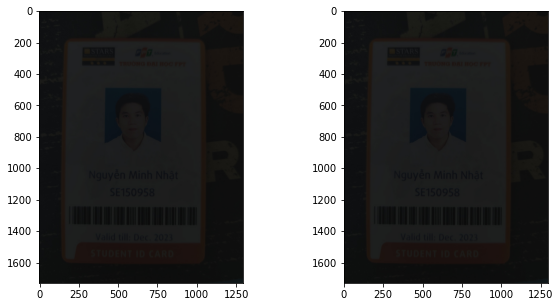

In [3]:
img = cv2.imread("/content/drive/MyDrive/IMP301/Project_IMP301/fptcart_low.jpg")
img  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
backup= img.copy()
for i in range(len(img[:,0,0])):
    for j in range(len(img[0,:,0])):
        R =int(img[i,j,0])
        G =int(img[i,j,1])
        B =int(img[i,j,2])

        sum_col = R+G+B

        if (sum_col >180) & (R>200) & (G>200) & (B>200):
            img[i,j,0] = img[i-1,j-1,0]
            img[i,j,1] = img[i-1,j-1,1]
            img[i,j,2] = img[i-1,j-1,2]

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(img) 
plt.subplot(1, 2, 2), plt.imshow(backup)
plt.show()

In [ ]:
#@title Step 1: Processing low light image


In [4]:
import sys
import cv2
import numpy as np

def change_brightness(img, alpha, beta):
    img_new = np.asarray(alpha*img + beta, dtype=int)   # cast pixel values to int
    img_new[img_new>255] = 255
    img_new[img_new<0] = 0
    return img_new

if __name__ == "__main__":
    alpha = 1
    beta = 10
    
    img = cv2.imread('/content/drive/MyDrive/IMP301/Project_IMP301/fpt_cart_02.jpg')       # [height, width, channel]
    
    # change image brightness g(x,y) = alpha*f(x,y) + beta
    img_new = change_brightness(img, alpha, beta)
    
    cv2.imwrite('fptcart_light.jpg', img_new)

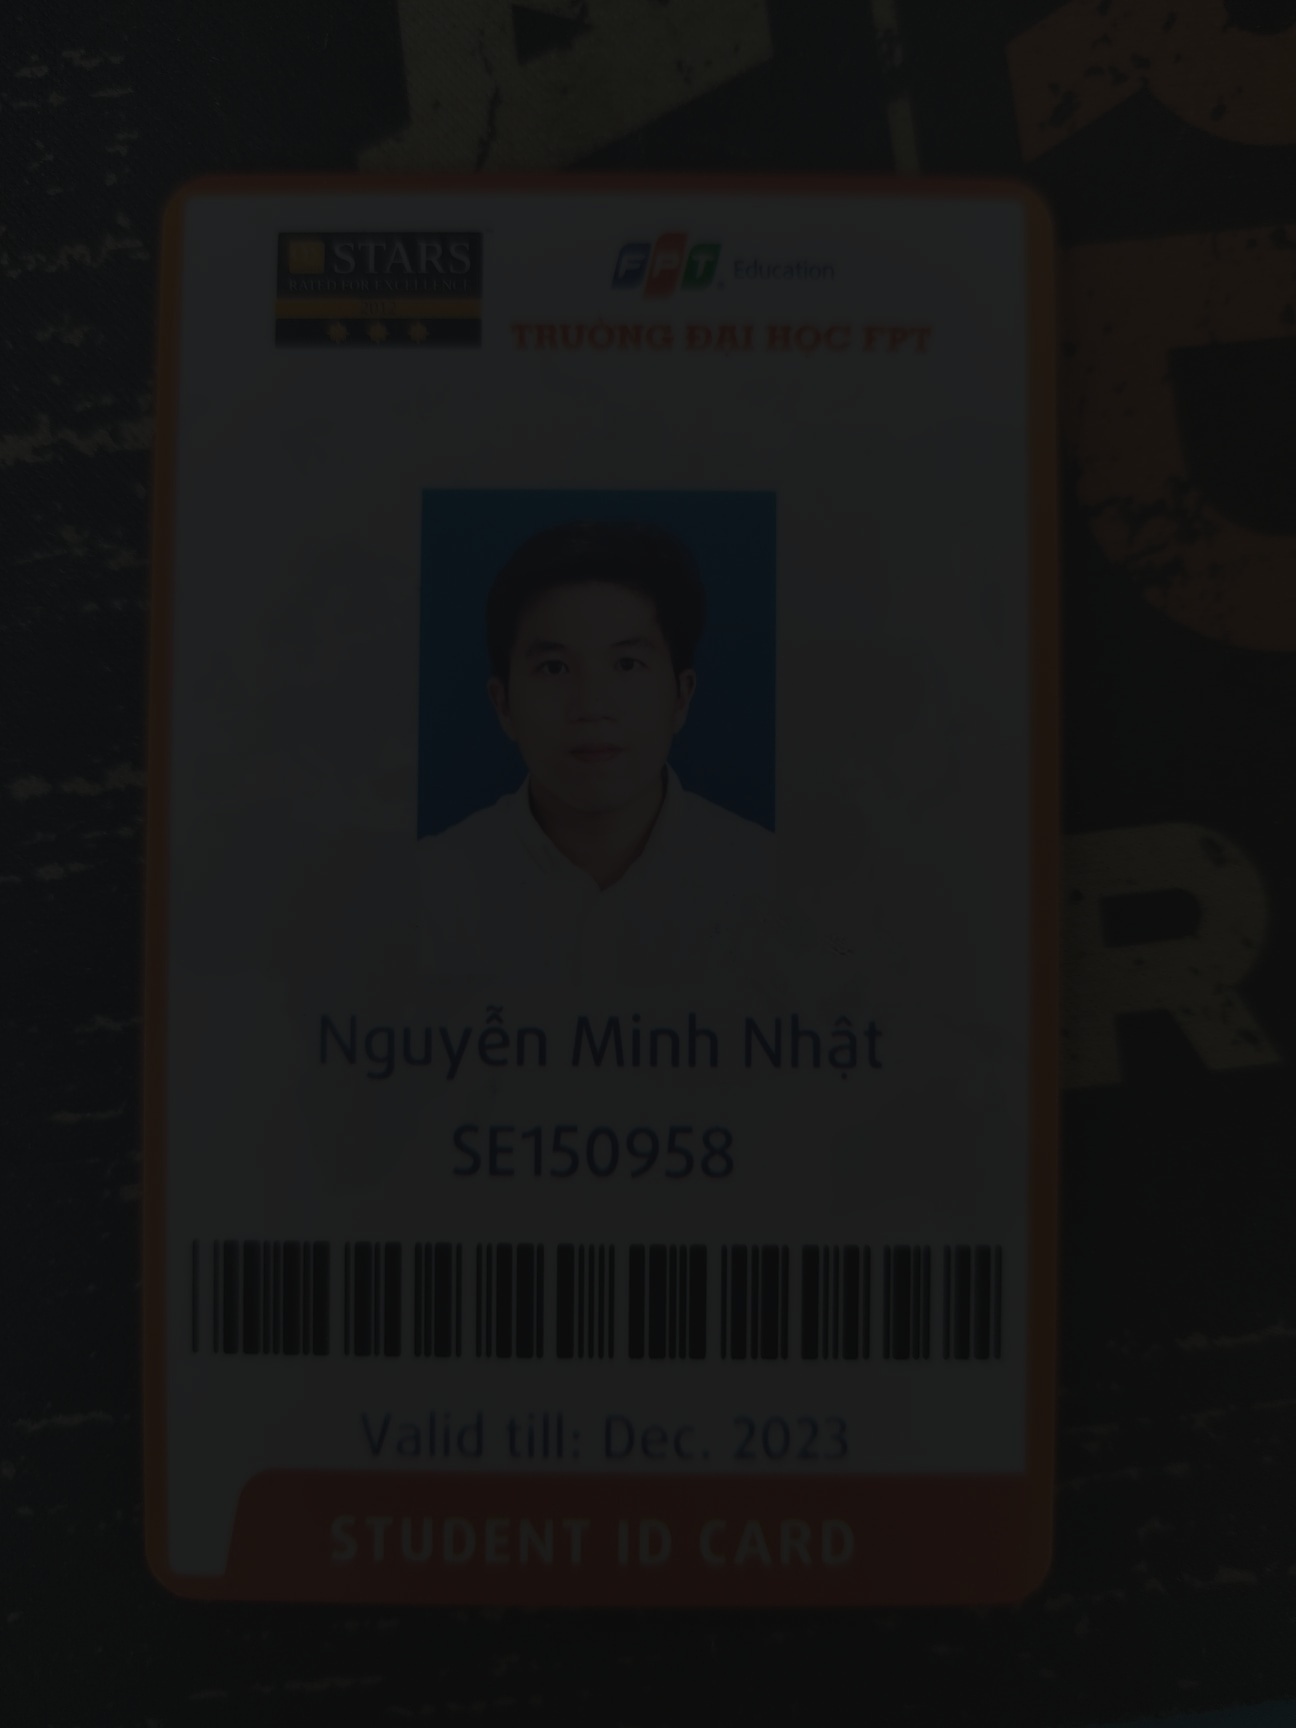

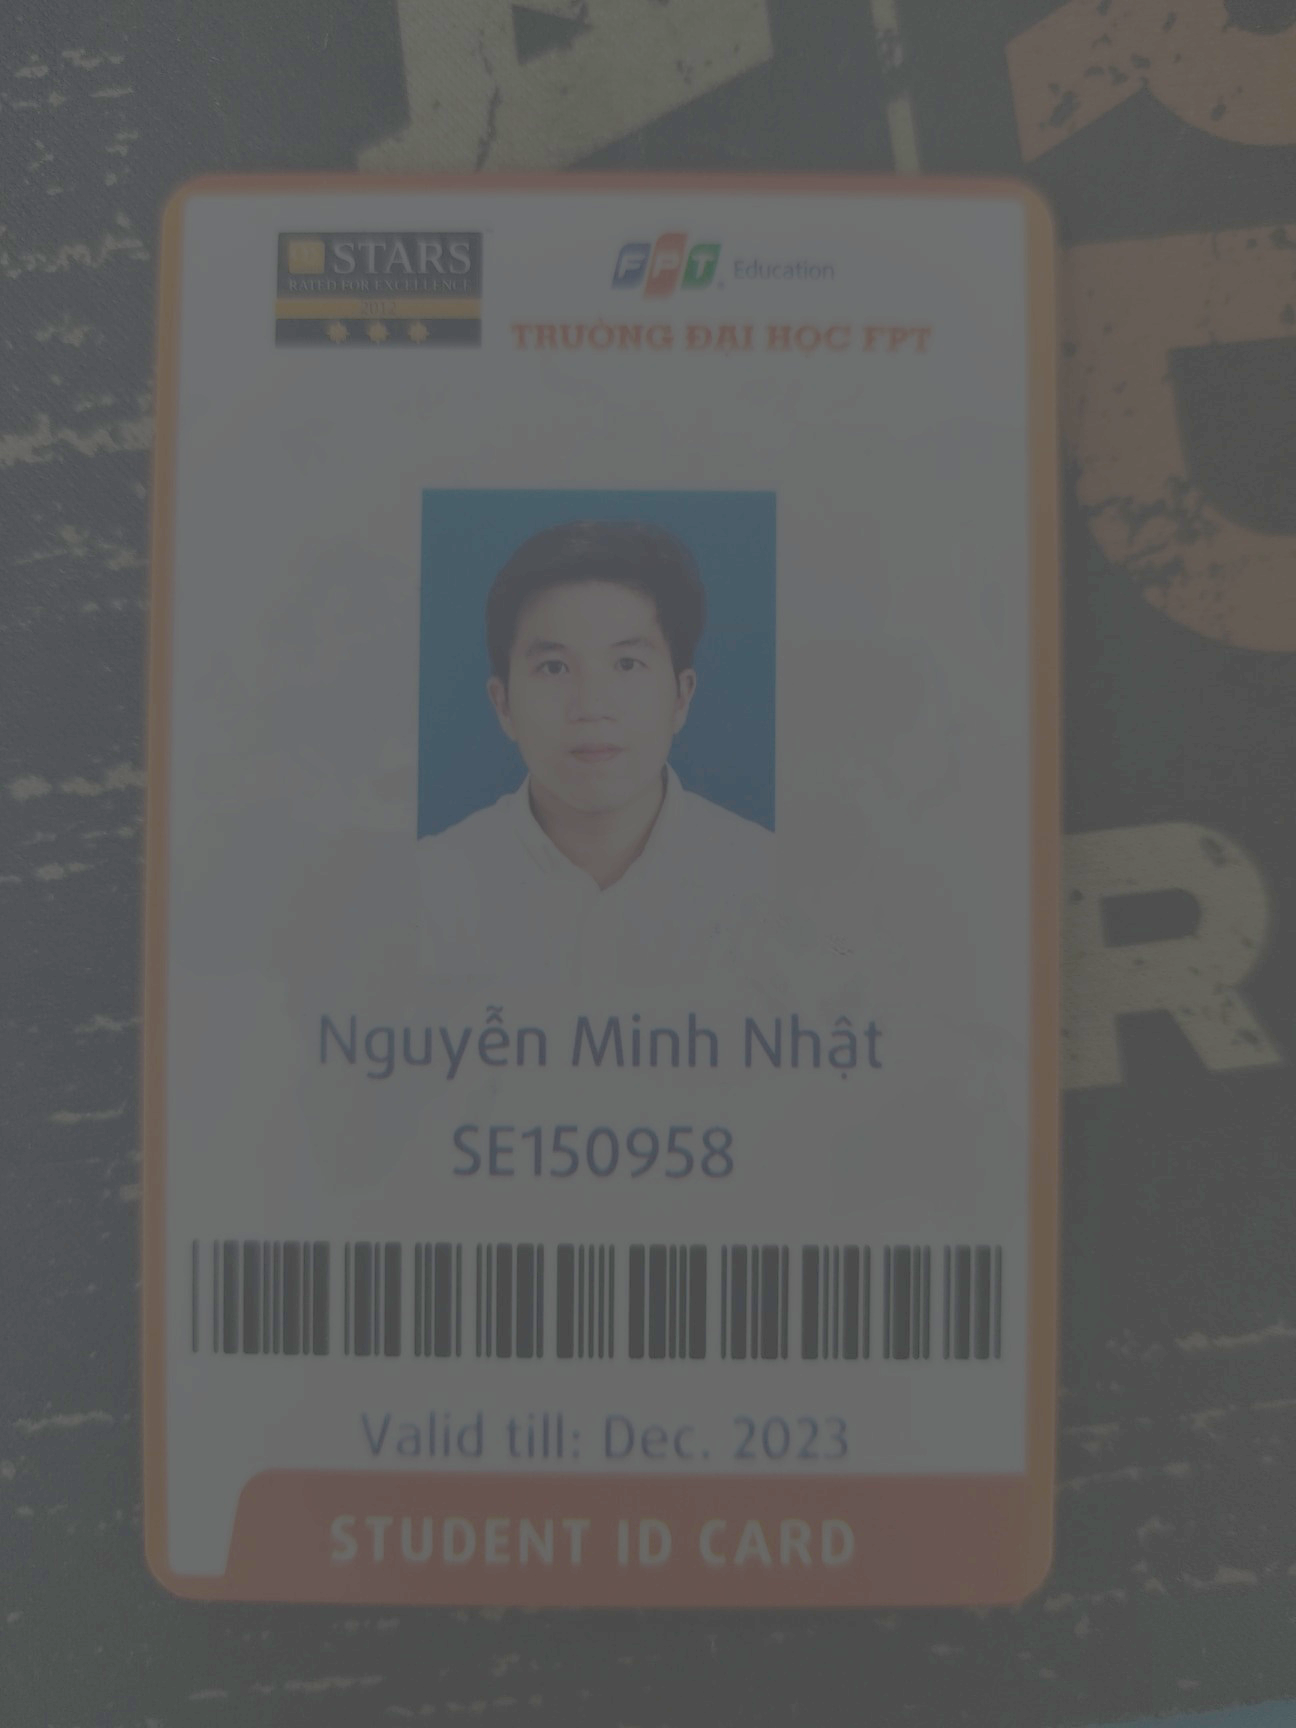

In [5]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

nat = io.imread('/content/drive/MyDrive/IMP301/Project_IMP301/fptcart_low.jpg')
nat_2 = cv.cvtColor(nat, cv.COLOR_BGR2RGB)
cv2_imshow(nat_2)

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv.LUT(src, table)


gamma = 2.5      # change the value here to get different result
adjusted = gammaCorrection(nat_2, gamma=gamma)
cv2_imshow(adjusted)

In [ ]:
#@title STEP 2: Processing image


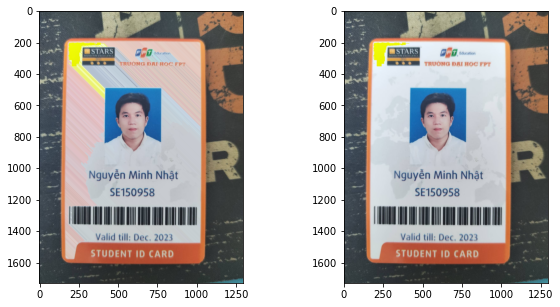

In [6]:
img = cv2.imread("/content/fptcart_light.jpg")
img  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
backup= img.copy()
for i in range(len(img[:,0,0])):
    for j in range(len(img[0,:,0])):
        R =int(img[i,j,0])
        G =int(img[i,j,1])
        B =int(img[i,j,2])

        sum_col = R+G+B

        if (sum_col >180) & (R>200) & (G>200) & (B>200):
            img[i,j,0] = img[i-1,j-1,0]
            img[i,j,1] = img[i-1,j-1,1]
            img[i,j,2] = img[i-1,j-1,2]

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(img) 
plt.subplot(1, 2, 2), plt.imshow(backup)
plt.show()

(1392, 871, 3)


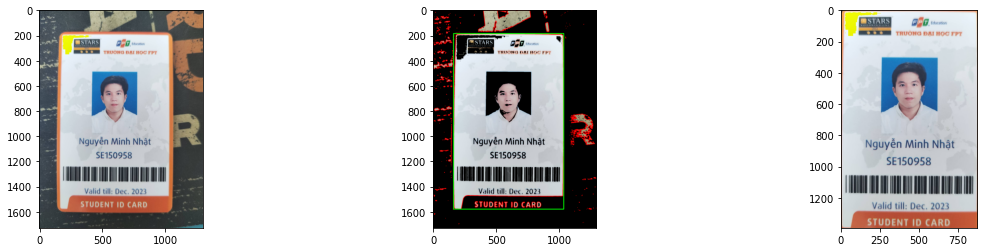

In [7]:
image = cv2.imread("/content/fptcart_light.jpg")




image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    # red color boundaries [B, G, R]
lower = [np.mean(image[:,:,i] - np.std(image[:,:,i])/3 ) for i in range(3)]
upper = [250, 250, 250]

    # create NumPy arrays from the boundaries
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

    # find the colors within the specified boundaries and apply
mask = cv2.inRange(image, lower, upper)
output = cv2.bitwise_and(image, image, mask=mask)

ret,thresh = cv2.threshold(mask, 40, 255, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


if len(contours) != 0:
    # draw in blue the contours that were founded
    cv2.drawContours(output, contours, -1, 255, 3)

    # find the biggest countour (c) by the area
    c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)

    # draw the biggest contour (c) in green
    cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),5)

foreground = image[y:y+h,x:x+w]
plt.figure(figsize=(20,4))
plt.subplot(1,3,1),plt.imshow(image)
plt.subplot(1,3,2),plt.imshow(output)
plt.subplot(1,3,3),plt.imshow(foreground)
print(foreground.shape)
cv2.imwrite('output.png',foreground)
plt.show()

In [ ]:
#@title Step 3: Main Program


In [8]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 8.5 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 62 not upgraded.
Need to get 5,330 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Get:4 http://archive.ubuntu.

In [9]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [10]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

 

 

Nguyen Minh Nhat
SE150958

NN RKA Ni NAK

Valid il Dec 2025

 



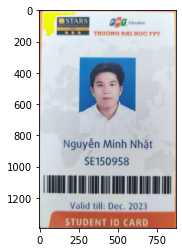

In [11]:
img = cv2.imread("/content/output.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [12]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', text.shape[0]+1)

In [13]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")
  
print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left   top  \
0       1         1          0        0         0         0     0     0   
1       2         1          1        0         0         0   110    42   
2       3         1          1        1         0         0   110    42   
3       4         1          1        1         1         0   110    42   
4       5         1          1        1         1         1   110    42   
..    ...       ...        ...      ...       ...       ...   ...   ...   
29      5         1          5        1         1         4   578  1238   
30      2         1          6        0         0         0    86  1286   
31      3         1          6        1         0         0    86  1286   
32      4         1          6        1         1         0    86  1286   
33      5         1          6        1         1         1    86  1286   

    width  height  conf  text  
0     871    1392    -1   NaN  
1     212     118    -1  

In [14]:
from pytesseract import Output

img = cv2.imread('/content/output.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


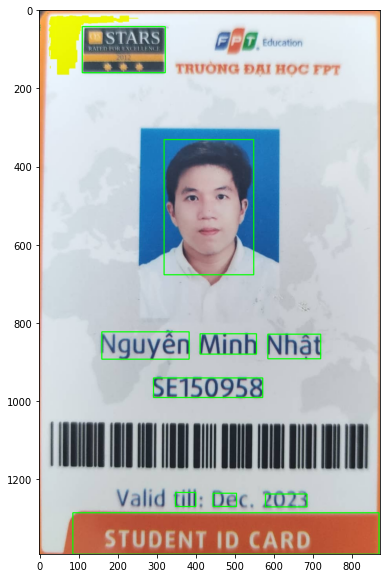

In [15]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

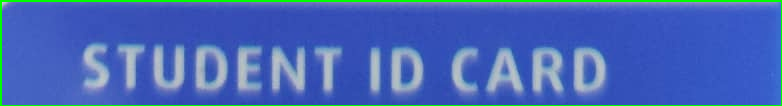

In [16]:
from google.colab.patches import cv2_imshow
roi = img[y: y+h, x: x+w]
cv2.imwrite("roi.png", roi)
cv2_imshow(roi)